Test of stable single-cell system, using drag lifetime from JASON model

In [5]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime
import numpy as np
R = 6371 # radius of earth in km
alt = 600 # altitude of Starlink satellites (km)
dh = 25 # height of band (km)
V = 4*np.pi*dh*(R+alt)**2 # volume of band
S_i = 0
D_i = 0
N_i = int(2.5e-8*V)
lam = 2000
T = 20
def drag_lifetime_loc(hmax, hmin, a_over_m): # something's not right with this
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(np.array([S_i]), np.array([D_i]), np.array([N_i]), np.array([alt]), 
                np.array([dh]), np.array([lam]), drag_lifetime_loc)

In [6]:
atmosphere.run_sim_precor(T, dt=1, mindtfactor=1000)
t = atmosphere.get_t()
S = atmosphere.get_S()[0]
D = atmosphere.get_D()[0]
N = atmosphere.get_N()[0]
C = atmosphere.get_C()[0]

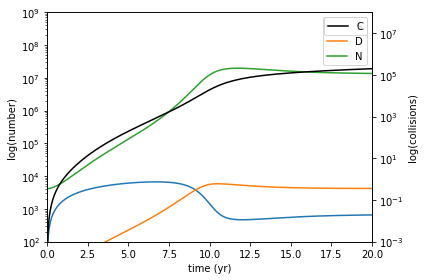

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S, label='S')
ax1.plot(t, D, label='D')
ax1.plot(t, N, label='N')
ax1.set_ylim(100, 1e9)
ax1.set_xlim(0,T)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('log(collisions)')  # we already handled the x-label with ax1
ax2.plot(t, C, label='C', color='k')
ax2.set_ylim(1e-3, 1e8)
ax2.set_yscale('log')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test of debris flowing through two layers, using drag lifetime from JASON model

In [8]:
from NCell import NCell
import numpy as np
R = 6371 # radius of earth in km
alt1, alt2 = 600, 625 # altitude of Starlink satellites (km)
dh = 25 # height of bands (km)
V1, V2 = 4*np.pi*dh*(R+alt1)**2, 4*np.pi*dh*(R+alt2)**2 # volume of bands
S_i = 0
D_i = 0
N_i1, N_i2 = int(2.5e-5*V1), int(2.5e-5*V2)
lam = 0
T = 50
def drag_lifetime(_a, _b, _c):
    return 5
atmosphere = NCell(np.array([S_i, S_i]), np.array([D_i, D_i]), np.array([N_i1, N_i2]), np.array([alt1, alt2]), 
                np.array([dh, dh]), np.array([lam, lam]), drag_lifetime)

In [9]:
atmosphere.run_sim_precor(T, upper=False)
t = atmosphere.get_t()
N1, N2 = atmosphere.get_N()

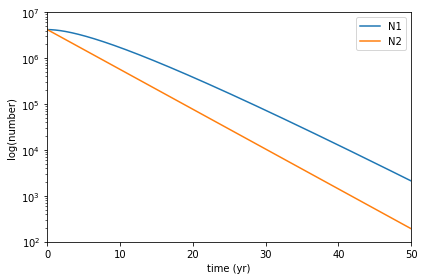

In [10]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(100, 1e7)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test of debris flowing through multiple cells, using proper drag lifetimes

In [11]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 50 # height of band (km)
alts = np.arange(600, 910, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = np.zeros(len(alts), dtype=np.int64)
D_i = np.zeros(len(alts), dtype=np.int64)
N_i = np.zeros(len(alts), dtype=np.int64)
N_i[-1] = int(2.5e-8*V[-1])
lam = np.zeros(len(alts), dtype=np.int64)
T = 30
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, D_i, N_i, alts, dhs, lam, drag_lifetime_loc)

In [12]:
atmosphere.run_sim_precor(T, upper=False)
t = atmosphere.get_t()
N = atmosphere.get_N() 

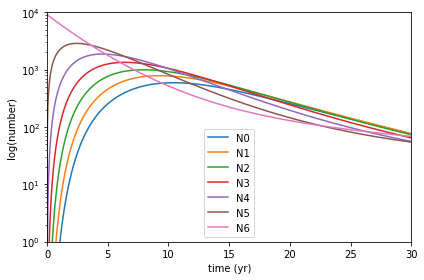

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
for i in range(0, len(N)):
    ax1.plot(t, N[i], label='N'+str(i))
ax1.set_ylim(1, 1e4)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test stiff N-cell system with multiple shells getting launched satellites

In [14]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 50 # height of band (km)
alts = np.arange(600, 910, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = np.zeros(len(alts), np.int64)
D_i = np.zeros(len(alts), np.int64)
N_i = np.zeros(len(alts), np.int64)
for i in range(len(alts)):
    N_i[i] = int(2.5e-8*V[i])
lam = np.zeros(len(alts))
lam[0] = 500
lam[3] = 500
lam[-1] = 500
T = 150
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, D_i, N_i, alts, dhs, lam, drag_lifetime_loc)

In [15]:
atmosphere.run_sim_precor(T, mindtfactor=5000)
t = atmosphere.get_t()
S0, S1, S2 = atmosphere.get_S()[0], atmosphere.get_S()[3], atmosphere.get_S()[-1]
D0, D1, D2 = atmosphere.get_D()[0], atmosphere.get_D()[3], atmosphere.get_D()[-1]
N0, N1, N2 = atmosphere.get_N()[0], atmosphere.get_N()[3], atmosphere.get_N()[-1] 

/tmp/ipykernel_31185/645747173.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


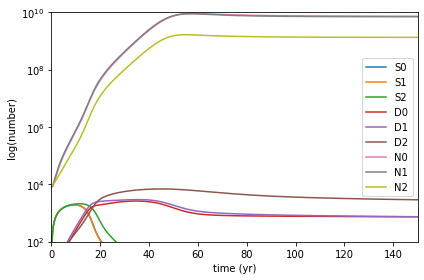

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S0, label='S0')
ax1.plot(t, S1, label='S1')
ax1.plot(t, S2, label='S2')
ax1.plot(t, D0, label='D0')
ax1.plot(t, D1, label='D1')
ax1.plot(t, D2, label='D2')
ax1.plot(t, N0, label='N0')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(100, 1e10)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [1]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 25 # height of band (km)
alts = np.arange(300, 810, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = np.zeros(len(alts))
S_i[10] = 2400
D_i = np.zeros(len(alts))
N_i = np.zeros(len(alts), np.int64)
del_t = np.zeros(len(alts))
tau_min = np.zeros(len(alts))
for i in range(len(alts)):
    N_i[i] = int(2.5e-8*V[i])
    del_t[i] = np.inf
    tau_min[i] = 1/1000
lam = np.zeros(len(alts))
T = 5
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, D_i, N_i, alts, dhs, lam, drag_lifetime_loc, del_t=del_t, tau_min=tau_min)

In [2]:
from scipy.stats import norm
mean = -2.6
for i in range(len(atmosphere.logL_edges) - 1):
    if atmosphere.logL_edges[i] <= mean and atmosphere.logL_edges[i+1] > mean:
        atmosphere.cells[10].N_bins[0][i,2] += int(10**8)
print(atmosphere.cells[10].N_bins[0][:,2])

sat = np.random.uniform(300-25/2,550-25/2,size=1000)
for i in range(len(atmosphere.cells)):
    bot, top = atmosphere.cells[i].alt - atmosphere.cells[i].dh/2, atmosphere.cells[i].alt + atmosphere.cells[i].dh/2
    atmosphere.cells[i].S[0] += len(sat[(sat >= bot) & (sat < top)])

[4.00000000e+00 1.00000005e+08 1.00000000e+00 0.00000000e+00
 1.00000000e+00 3.00000000e+00 3.30000000e+01 3.60000000e+01
 1.10000000e+01 4.00000000e+00]


In [3]:
atmosphere.run_sim_precor(T, mindtfactor=10000)
t = atmosphere.get_t()
S0, S1, S2 = atmosphere.get_S()[10], atmosphere.get_S()[5], atmosphere.get_S()[0]
D0, D1, D2 = atmosphere.get_D()[10], atmosphere.get_D()[5], atmosphere.get_D()[0]
N0, N1, N2 = atmosphere.get_N()[10], atmosphere.get_N()[5], atmosphere.get_N()[0] 

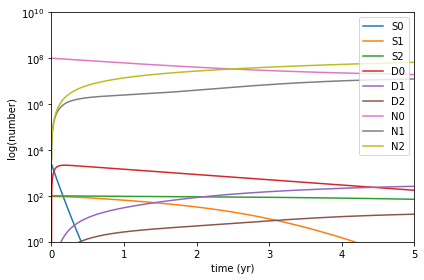

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S0, label='S0')
ax1.plot(t, S1, label='S1')
ax1.plot(t, S2, label='S2')
ax1.plot(t, D0, label='D0')
ax1.plot(t, D1, label='D1')
ax1.plot(t, D2, label='D2')
ax1.plot(t, N0, label='N0')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(1, 1e10)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()